# Basics with numerical time-series

_

## Environment and data

_

In [1]:
# EpyNN/nnlive/dummy_time/train.ipynb
# Standard library imports
import random

# Related third party imports
import numpy as np

# Local application/library specific imports
import nnlibs.initialize
from nnlibs.commons.maths import relu, softmax
from nnlibs.commons.library import (
    configure_directory,
    read_model,
)
from nnlibs.network.models import EpyNN
from nnlibs.dropout.models import Dropout
from nnlibs.embedding.models import Embedding
from nnlibs.flatten.models import Flatten
from nnlibs.rnn.models import RNN
from nnlibs.dense.models import Dense
from prepare_dataset import prepare_dataset
from settings import se_hPars


########################## CONFIGURE ##########################
random.seed(1)
np.random.seed(1)

np.set_printoptions(threshold=10)

np.seterr(all='warn')

configure_directory()


############################ DATASET ##########################
X_features, Y_label = prepare_dataset(N_SAMPLES=1024)

_

## Feed-Forward (FF)

_

### Embedding

_

In [2]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      Y_encode=True,
                      relative_size=(2, 1, 0))

_

### Multi-layers with Dropout

_

In [3]:
name = 'Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax'

se_hPars['learning_rate'] = 0.005

flatten = Flatten()

dropout1 = Dropout(keep_prob=1)

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.7)

dense = Dense(2, softmax)

layers = [embedding, flatten, dropout1, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [4]:
model.initialize(loss='MSE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: Flatten
compute_shapes: Flatten
initialize_parameters: Flatten
forward: Flatten
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Flatten
backward: Flatten
compute_gradients: Flatten
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [6]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+-------+----------+-------+-------+------------------------------------------------------------------------+
| epoch |  lrate   |  lrate   |       | accuracy |       |  MSE  |                               Experiment                               |
|       |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                                                        |
+-------+----------+----------+-------+----------+-------+-------+------------------------------------------------------------------------+
|   0   | 5.00e-03 | 5.00e-03 | 0.485 |  0.507   | 0.440 | 0.405 | 1628629313_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  10   | 5.00e-03 | 5.00e-03 | 0.854 |  0.783   | 0.111 | 0.168 | 1628629313_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  20   | 5.00e-03 | 5.00e-03 | 0.906 |  0.806   | 0.072 | 0.144 | 1628629313_Flatten_Dropout-08_Dense-64-relu_Dropout-07_Dense-2-softmax |
|  30   | 5.00e-03 |

_

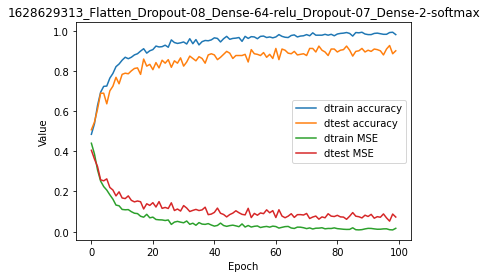

In [7]:
model.plot(path=False)

_

## Recurrent Neural Network (RNN)

_

### Embedding

_

In [8]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      Y_encode=True,
                      relative_size=(2, 1, 0))

_

In [9]:
name = 'RNN-128_Flatten_Dense-2-softmax'

se_hPars['learning_rate'] = 0.001
se_hPars['softmax_temperature'] = 5

rnn = RNN(128)

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.7)

dense = Dense(2, softmax)

layers = [embedding, rnn, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [10]:
model.initialize(loss='BCE', seed=1, se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: RNN
compute_shapes: RNN
initialize_parameters: RNN
forward: RNN
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: RNN
backward: RNN
compute_gradients: RNN
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [11]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+----------+-------+----------+-------+-------+--------------------------------------------+
| epoch |  lrate   |  lrate   |  lrate   |       | accuracy |       |  BCE  |                 Experiment                 |
|       |   RNN    |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)  |                                            |
+-------+----------+----------+----------+-------+----------+-------+-------+--------------------------------------------+
|   0   | 1.00e-03 | 1.00e-03 | 1.00e-03 | 0.523 |  0.496   | 0.694 | 0.708 | 1628629315_RNN-128_Flatten_Dense-2-softmax |
|  10   | 1.00e-03 | 1.00e-03 | 1.00e-03 | 0.745 |  0.645   | 0.605 | 0.649 | 1628629315_RNN-128_Flatten_Dense-2-softmax |
|  20   | 1.00e-03 | 1.00e-03 | 1.00e-03 | 0.811 |  0.730   | 0.526 | 0.576 | 1628629315_RNN-128_Flatten_Dense-2-softmax |
|  30   | 1.00e-03 | 1.00e-03 | 1.00e-03 | 0.836 |  0.765   | 0.445 | 0.497 | 1628629315_RNN-128_Flatten_Dense-2-softmax |
|  40   | 1.00e-

_

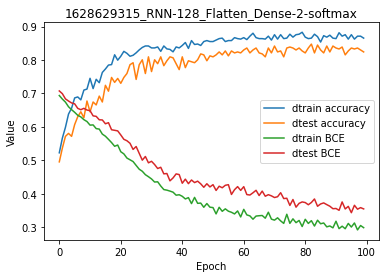

In [12]:
model.plot(path=False)

_